# Case Study - Customer Buy Affinity On E-commerce Dataset 

In [2]:
#importing for exploratory data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing for undersampling and oversampling techniques
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


#different models to try
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Reading the data for training

In [3]:
df = pd.read_csv('BuyAffinity_Train.txt',sep='\t',index_col='Index')

# Checking the head of data

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
Index,,,,,,,,,,,,,,,,,,,,,
1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


# Dropping the F14,F15 date columns

In [5]:
df =df.drop(columns=['F15', 'F16'])
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
Index,,,,,,,,,,,,,,,,,,,,,
1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,316195953,6176861823,-3433637453,2,1,706,305,1,2,0
2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,...,1378635942,-9031507610,609277486,1,1,423,206,18,7,1
3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,-9921889287,-5610051842,-8977995005,2,1,703,315,1,4,0
4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,6550322883,-4697085930,4868760308,1,1,122,304,15,1,0
5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,759031103,9984692447,9757408267,1,1,486,240,1,1,0


# Describing the data

In [6]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,1.011800e+05,...,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,1.869749e+07,...,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,5.769064e+09,...,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-9.999816e+09,...,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,-4.966961e+09,...,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,4.346691e+07,...,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,5.019440e+09,...,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9.999497e+09,...,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


# Finding the percentage missing data
<font color='green'>No data is missing for any attribute</font>

In [7]:
miss_per = df.isnull().sum()/df.shape[0]
print(miss_per)

F1     0.0
F2     0.0
F3     0.0
F4     0.0
F5     0.0
F6     0.0
F7     0.0
F8     0.0
F9     0.0
F10    0.0
F11    0.0
F12    0.0
F13    0.0
F14    0.0
F17    0.0
F18    0.0
F19    0.0
F20    0.0
F21    0.0
F22    0.0
C      0.0
dtype: float64


# Checking distribution of positive and negative class
There is class imbalance between negative and positive class

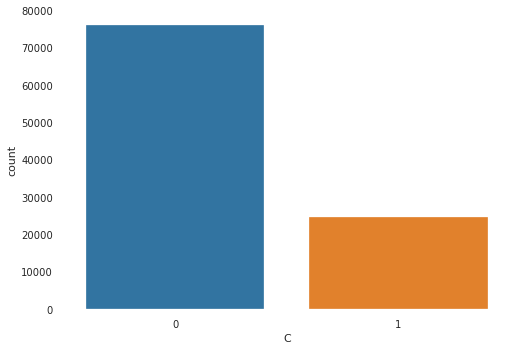

In [8]:
_=sns.countplot(x='C',data=df)

# Training with LogisticRegression
<font color='red'>Does not work well on imbalanced data</font>

In [9]:
data = df.to_numpy()
X,y = data[:,:-1],data[:,-1]
X =StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)
clf = LogisticRegression(verbose=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rep=classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     22906
         1.0       0.00      0.00      0.00      7448

    accuracy                           0.75     30354
   macro avg       0.38      0.50      0.43     30354
weighted avg       0.57      0.75      0.65     30354



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/durgesh/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training With RandomForest
<font color='green'>Performs a bit better to logistic regression on imbalanced data </font>

In [10]:
data = df.to_numpy()
X,y = data[:,:-1],data[:,-1]
X =StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)
clf = RandomForestClassifier(verbose=1,n_jobs=80)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rep=classification_report(y_test, y_pred)
print(rep)

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  42 out of 100 | elapsed:   14.4s remaining:   19.9s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:   18.2s finished
[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.


              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86     22906
         1.0       0.44      0.02      0.04      7448

    accuracy                           0.75     30354
   macro avg       0.60      0.51      0.45     30354
weighted avg       0.68      0.75      0.66     30354



[Parallel(n_jobs=80)]: Done  42 out of 100 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    0.4s finished


# Performing Under Sampling And Training With RandomForest
<font color='green'>Random forests performs better with balanced data </font>

In [11]:
rus = RandomUnderSampler()
data = df.to_numpy()
X,y = data[:,:-1],data[:,-1]
X =StandardScaler().fit_transform(X)
X,y = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)
clf = RandomForestClassifier(verbose=1,n_jobs=80)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rep=classification_report(y_test, y_pred)
print(rep)

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  42 out of 100 | elapsed:    6.4s remaining:    8.8s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.


              precision    recall  f1-score   support

         0.0       0.79      0.48      0.60      7449
         1.0       0.63      0.88      0.73      7448

    accuracy                           0.68     14897
   macro avg       0.71      0.68      0.66     14897
weighted avg       0.71      0.68      0.66     14897



[Parallel(n_jobs=80)]: Done  42 out of 100 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    0.2s finished


# Performing Over Sampling And Training with RandomForest
<font color='green'>Random forests performs better with over-sampling balanced data as there is more datapoints to train </font>

In [12]:
ros = RandomOverSampler()
data = df.to_numpy()
X,y = data[:,:-1],data[:,-1]
X =StandardScaler().fit_transform(X)
X,y = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)
clf = RandomForestClassifier(verbose=1,n_jobs=80)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rep=classification_report(y_test, y_pred)
print(rep)

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  42 out of 100 | elapsed:   21.0s remaining:   29.0s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.


              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     22906
         1.0       0.85      0.92      0.88     22906

    accuracy                           0.88     45812
   macro avg       0.88      0.88      0.88     45812
weighted avg       0.88      0.88      0.88     45812



[Parallel(n_jobs=80)]: Done  42 out of 100 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    0.8s finished


# Predicting labels on BuyAffinity_Test data

In [26]:
df_test = pd.read_csv('BuyAffinity_Test.txt',sep='\t',index_col='Index')
df_test =df_test.drop(columns=['F15', 'F16'])
data_test = df_test.to_numpy()
X_test = data_test
X_test =StandardScaler().fit_transform(X_test)
y_pred = clf.predict(X_test).astype(np.int32)
df_test = pd.read_csv('BuyAffinity_Test.txt',sep='\t',index_col='Index')
df_test['C']= y_pred
df_test.to_csv('BuyAffinity_Test_labels.txt', sep='\t', mode='w')
df_test.head()

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  42 out of 100 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=80)]: Done 100 out of 100 | elapsed:    0.4s finished


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
Index,,,,,,,,,,,,,,,,,,,,,
T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,-3461806391,...,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1,0
T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,-36253473,...,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4,0
T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,5354243488,...,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1,0
T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,7405036171,...,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21,0
T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,-6351599280,...,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1,1
